# Data Analysis - Product Insight

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
sales_data = pd.read_csv('../data/Product Insights - 2022-2023 Sales.csv')
fiscal_calendar = pd.read_csv('../data/de_dates.csv')

print("Sales Data:")
print(sales_data.head())

print("\nFiscal Calendar:")
print(fiscal_calendar.head())


Sales Data:
  TRANSACTION_DATE          LOCATION_ID             ORDER_ID  \
0        9/15/2023  5381359054857415170 -6719308655116430000   
1        3/18/2022 -4199173001801520000 -6378926798744470000   
2        7/14/2023  5685263721614244213  6102719515008744276   
3         4/6/2022 -5067008464076210000 -5982285096719080000   
4        6/12/2023 -5591079094253810000 -3971618995716690000   

           CUSTOMER_ID           SKU_NUMBER         STYLE_NUMBER  \
0  2615747808920676222 -7253962859621530000 -4147267151382690000   
1  1887452110738807739  5422249653400898675  -313994741047813000   
2 -1296229179810210000  6245575513011636165 -4724890390615580000   
3 -2738066512337320000 -8479039255313250000 -1553484492876750000   
4 -4612109181828620000  3357108323404969175 -3145342290914690000   

    COLOUR_NAME        COLOUR_NUMBER COLOUR_CODE COLOUR_FAMILY  \
0         WHITE -7990442703153960000         WHT         WHITE   
1  VIVID VIOLET  6700927323266645156         VVV        PURPLE

In [2]:
# Handle missing values
sales_data.fillna(0, inplace=True)

# Formatting date values
sales_data['TRANSACTION_DATE'] = pd.to_datetime(sales_data['TRANSACTION_DATE'])

fiscal_calendar['CALENDAR_DATE'] = pd.to_datetime(fiscal_calendar['CALENDAR_DATE'])


Merging sales date with  calendar date (fiscal)

In [3]:
merged_data = pd.merge(sales_data, fiscal_calendar, left_on='TRANSACTION_DATE', right_on='CALENDAR_DATE', how='left')

print("Merged Data:")
print(merged_data.head())


Merged Data:
  TRANSACTION_DATE          LOCATION_ID             ORDER_ID  \
0       2023-09-15  5381359054857415170 -6719308655116430000   
1       2022-03-18 -4199173001801520000 -6378926798744470000   
2       2023-07-14  5685263721614244213  6102719515008744276   
3       2022-04-06 -5067008464076210000 -5982285096719080000   
4       2023-06-12 -5591079094253810000 -3971618995716690000   

           CUSTOMER_ID           SKU_NUMBER         STYLE_NUMBER  \
0  2615747808920676222 -7253962859621530000 -4147267151382690000   
1  1887452110738807739  5422249653400898675  -313994741047813000   
2 -1296229179810210000  6245575513011636165 -4724890390615580000   
3 -2738066512337320000 -8479039255313250000 -1553484492876750000   
4 -4612109181828620000  3357108323404969175 -3145342290914690000   

    COLOUR_NAME        COLOUR_NUMBER COLOUR_CODE COLOUR_FAMILY  ...  \
0         WHITE -7990442703153960000         WHT         WHITE  ...   
1  VIVID VIOLET  6700927323266645156         VVV   

Time-Based Analysis

In [6]:
# Extract year, month, and quarter
merged_data['YEAR'] = merged_data['TRANSACTION_DATE'].dt.year
merged_data['MONTH'] = merged_data['TRANSACTION_DATE'].dt.month
merged_data['QUARTER'] = merged_data['TRANSACTION_DATE'].dt.quarter


filtered_data = merged_data[(merged_data['YEAR'] == 2022) | (merged_data['YEAR'] == 2023)]

# Group by year and month to get monthly sales data
monthly_sales = filtered_data.groupby(['YEAR', 'MONTH'])['NET_SALES_UNITS'].sum().reset_index()

# Group by year and quarter to get quarterly sales data
quarterly_sales = filtered_data.groupby(['YEAR', 'QUARTER'])['NET_SALES_UNITS'].sum().reset_index()


Monthly Sales

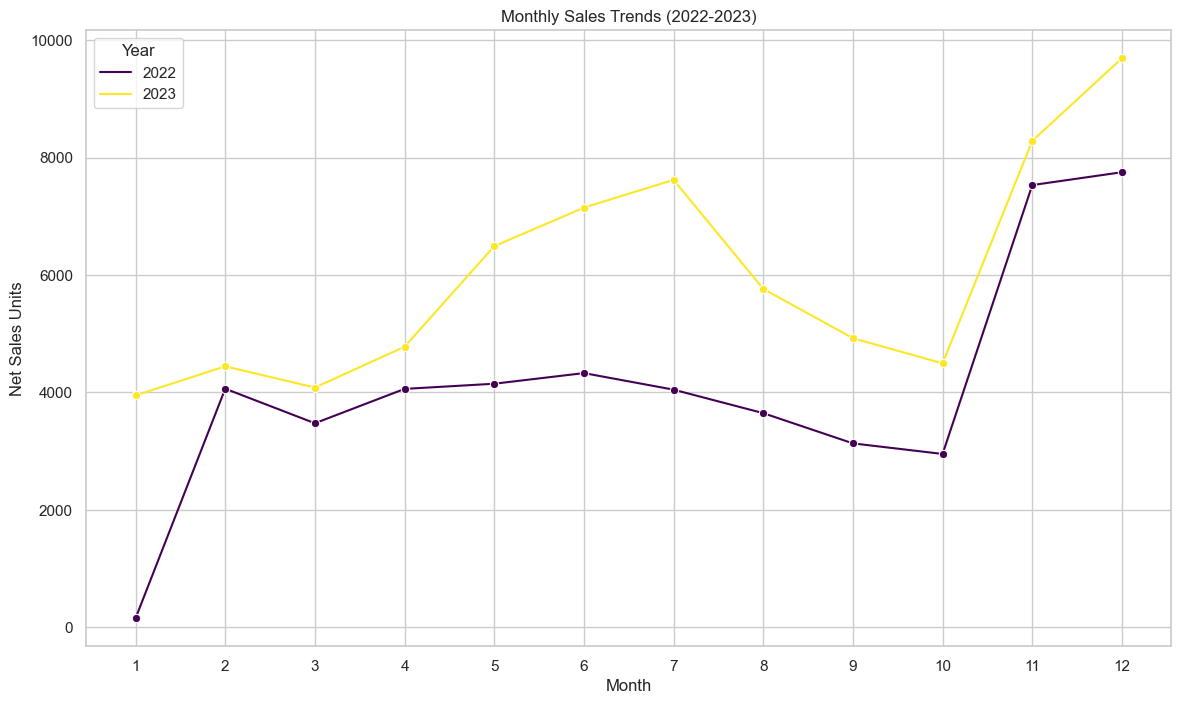

In [7]:
sns.set(style="whitegrid")

# Monthly Sales Visualization
plt.figure(figsize=(14, 8))
sns.lineplot(data=monthly_sales, x='MONTH', y='NET_SALES_UNITS', hue='YEAR', marker="o", palette="viridis")
plt.title('Monthly Sales Trends (2022-2023)')
plt.xlabel('Month')
plt.ylabel('Net Sales Units')
plt.xticks(range(1, 13))
plt.legend(title='Year')
plt.show()


 Quarterly Sales 

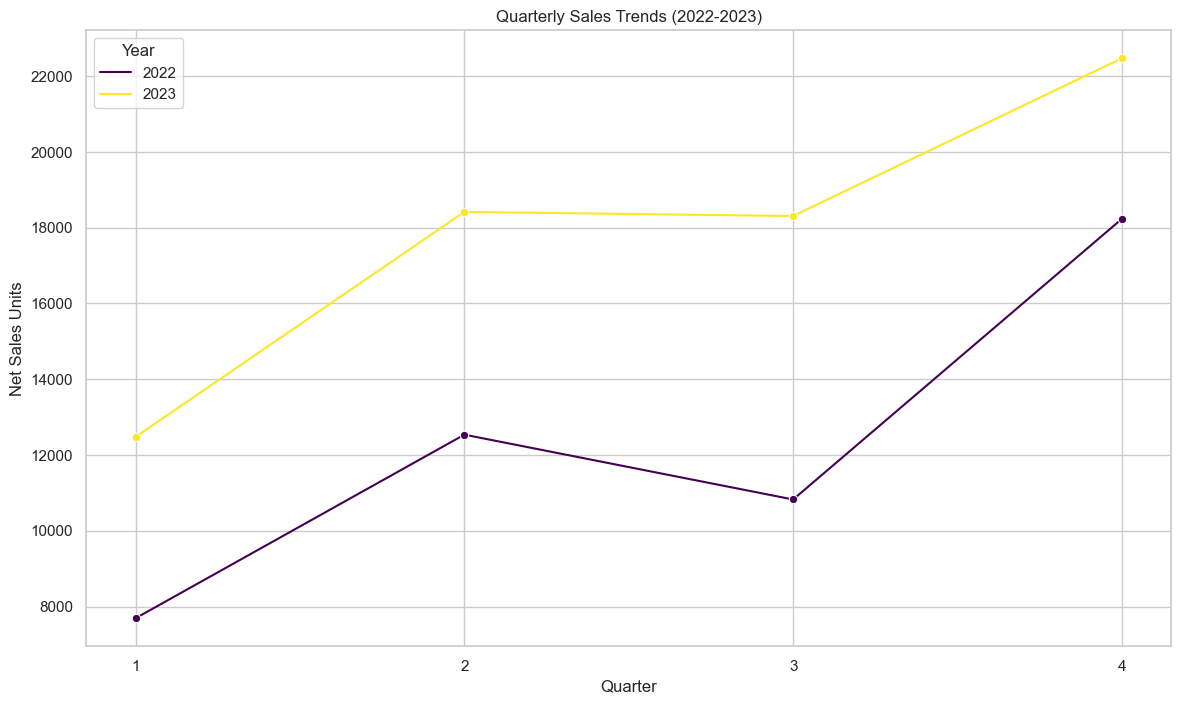

In [8]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=quarterly_sales, x='QUARTER', y='NET_SALES_UNITS', hue='YEAR', marker="o", palette="viridis")
plt.title('Quarterly Sales Trends (2022-2023)')
plt.xlabel('Quarter')
plt.ylabel('Net Sales Units')
plt.xticks(range(1, 5))
plt.legend(title='Year')
plt.show()

Business-Category Assortment

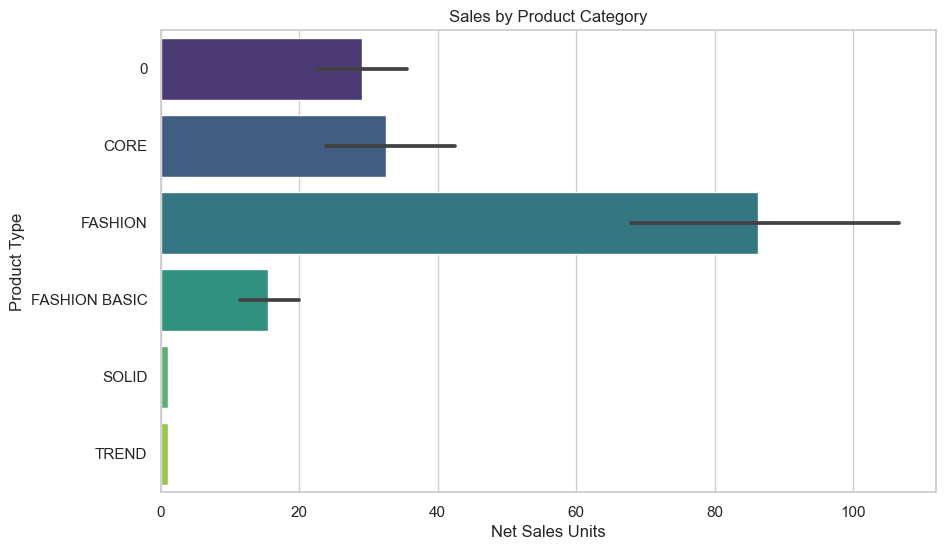

In [9]:
category_sales = merged_data.groupby(['PRODUCT_TYPE', 'FIT', 'SIZE', 'COLOUR_FAMILY'])['NET_SALES_UNITS'].sum().reset_index()

sns.set(style="whitegrid")

# Sales by Product Category
plt.figure(figsize=(10, 6))
sns.barplot(x='NET_SALES_UNITS', y='PRODUCT_TYPE', data=category_sales, palette="viridis")
plt.title('Sales by Product Category')
plt.xlabel('Net Sales Units')
plt.ylabel('Product Type')
plt.show()


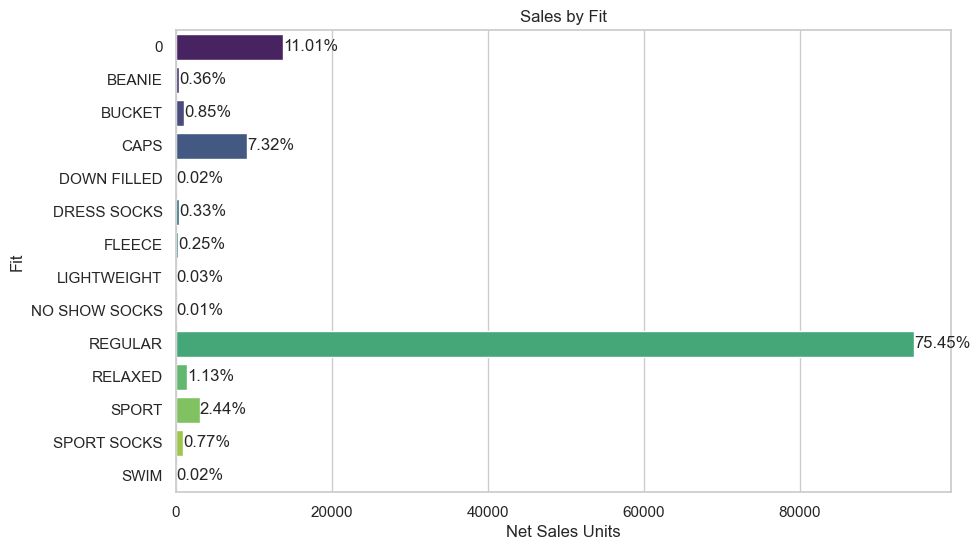

In [21]:
# Sales by Fit
fit_sales = merged_data.groupby('FIT')['NET_SALES_UNITS'].sum().reset_index()

total_sales_units = fit_sales['NET_SALES_UNITS'].sum()

fit_sales['PERCENTAGE'] = (fit_sales['NET_SALES_UNITS'] / total_sales_units) * 100

plt.figure(figsize=(10, 6))
sns.barplot(x='NET_SALES_UNITS', y='FIT', data=fit_sales, palette="viridis")
plt.title('Sales by Fit')
plt.xlabel('Net Sales Units')
plt.ylabel('Fit')

for index, value in enumerate(fit_sales['NET_SALES_UNITS']):
    plt.text(value, index, f'{fit_sales["PERCENTAGE"][index]:.2f}%', va='center')

plt.show()

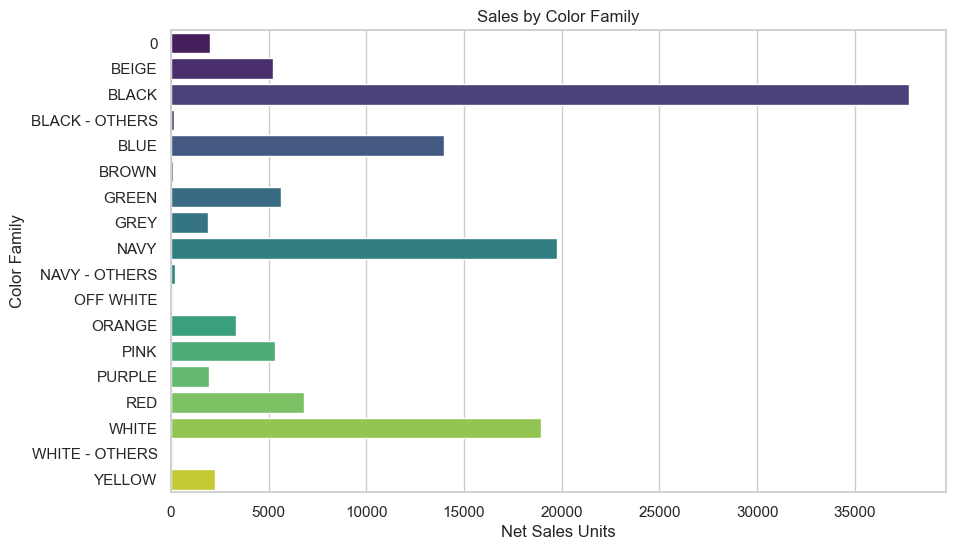

In [15]:
# Sales by Color Family
color_sales = merged_data.groupby('COLOUR_FAMILY')['NET_SALES_UNITS'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='NET_SALES_UNITS', y='COLOUR_FAMILY', data=color_sales, palette="viridis")
plt.title('Sales by Color Family')
plt.xlabel('Net Sales Units')
plt.ylabel('Color Family')
plt.show()

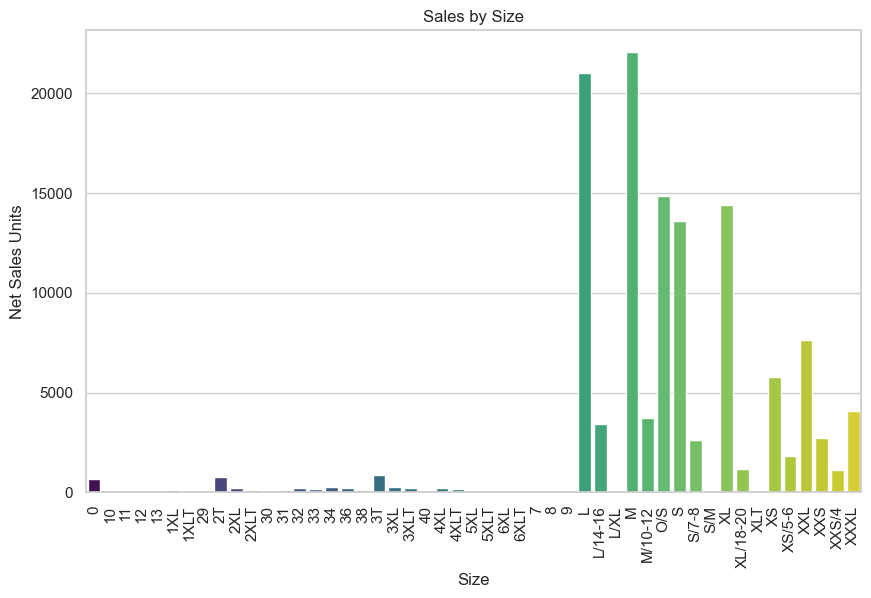

In [19]:
# Sales by Size
size_sales = merged_data.groupby('SIZE')['NET_SALES_UNITS'].sum().reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(x='SIZE', y='NET_SALES_UNITS', data=size_sales, palette="viridis")
plt.title('Sales by Size')
plt.ylabel('Net Sales Units')
plt.xlabel('Size')
plt.xticks(rotation=90)
plt.show()

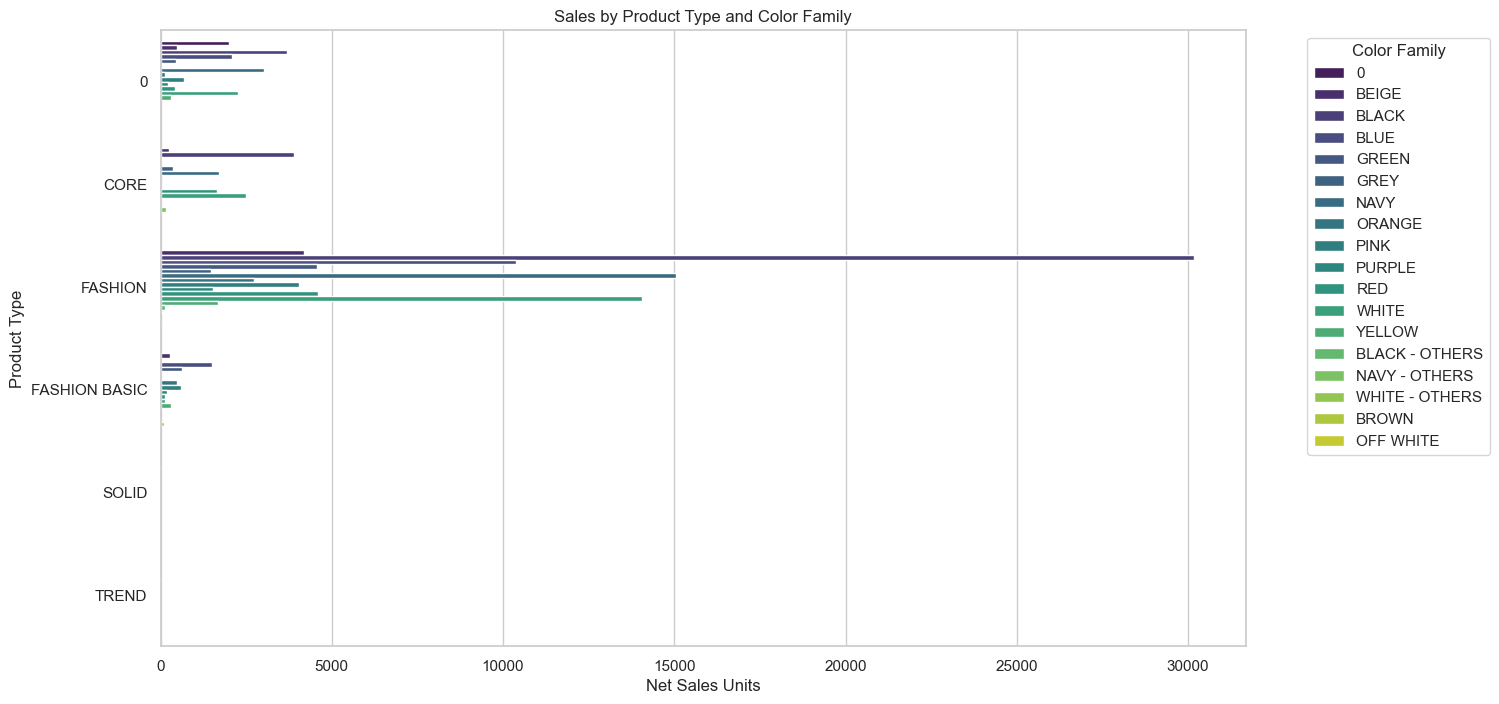

In [20]:
#Sales by product type and color family
product_color_sales = merged_data.groupby(['PRODUCT_TYPE', 'COLOUR_FAMILY'])['NET_SALES_UNITS'].sum().reset_index()
plt.figure(figsize=(14, 8))
sns.barplot(x='NET_SALES_UNITS', y='PRODUCT_TYPE', hue='COLOUR_FAMILY', data=product_color_sales, palette="viridis")
plt.title('Sales by Product Type and Color Family')
plt.xlabel('Net Sales Units')
plt.ylabel('Product Type')
plt.legend(title='Color Family', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Discount Impact

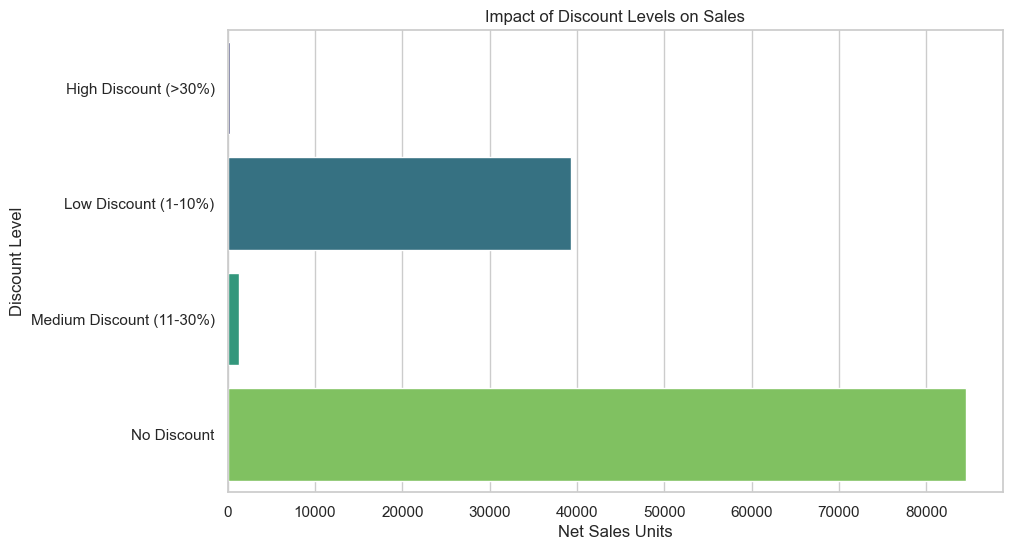

In [22]:
# Define discount levels
def discount_level(discount):
    if discount == 0:
        return 'No Discount'
    elif discount <= 10:
        return 'Low Discount (1-10%)'
    elif discount <= 30:
        return 'Medium Discount (11-30%)'
    else:
        return 'High Discount (>30%)'

merged_data['DISCOUNT_LEVEL'] = merged_data['DISCOUNTS_USD'].apply(discount_level)

# Group by discount level
discount_sales = merged_data.groupby('DISCOUNT_LEVEL')['NET_SALES_UNITS'].sum().reset_index()

# Visualize the impact of discount levels on sales
plt.figure(figsize=(10, 6))
sns.barplot(x='NET_SALES_UNITS', y='DISCOUNT_LEVEL', data=discount_sales, palette="viridis")
plt.title('Impact of Discount Levels on Sales')
plt.xlabel('Net Sales Units')
plt.ylabel('Discount Level')
plt.show()

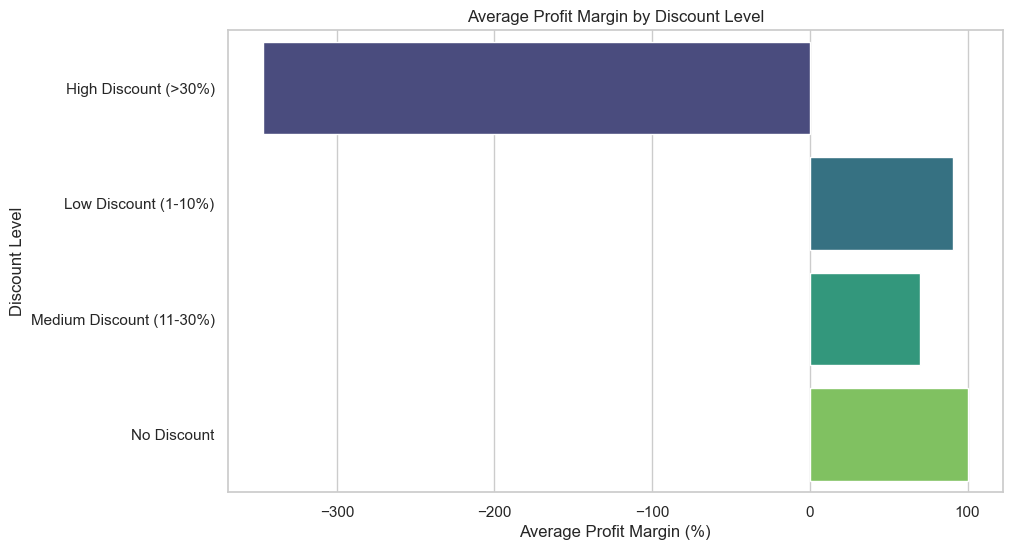

In [23]:
# Calculate the profit margin
merged_data['PROFIT_MARGIN'] = (merged_data['ORIGINAL_PRICE'] - merged_data['DISCOUNTS_USD']) / merged_data['ORIGINAL_PRICE'] * 100

# Group by discount level and calculate the average profit margin
profit_margin = merged_data.groupby('DISCOUNT_LEVEL')['PROFIT_MARGIN'].mean().reset_index()

# Visualize the profit margin by discount level
plt.figure(figsize=(10, 6))
sns.barplot(x='PROFIT_MARGIN', y='DISCOUNT_LEVEL', data=profit_margin, palette="viridis")
plt.title('Average Profit Margin by Discount Level')
plt.xlabel('Average Profit Margin (%)')
plt.ylabel('Discount Level')
plt.show()

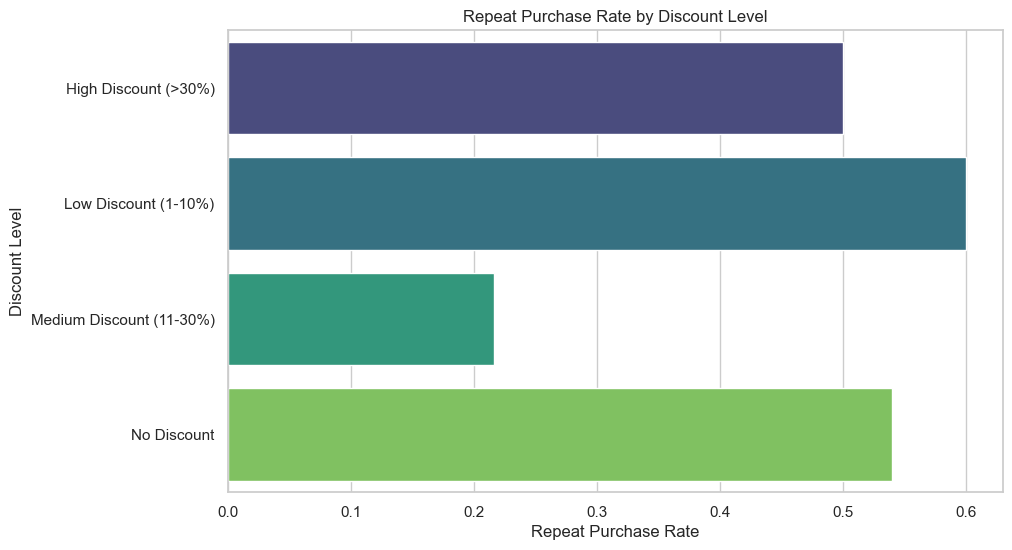

In [24]:
# Analyze repeat purchases and customer retention based on discount levels
customer_behavior = merged_data.groupby(['CUSTOMER_ID', 'DISCOUNT_LEVEL']).size().reset_index(name='PURCHASE_COUNT')

# Define repeat purchase behavior
customer_behavior['REPEAT_PURCHASE'] = customer_behavior['PURCHASE_COUNT'] > 1

# Group b
repeat_purchase_rate = customer_behavior.groupby('DISCOUNT_LEVEL')['REPEAT_PURCHASE'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(x='REPEAT_PURCHASE', y='DISCOUNT_LEVEL', data=repeat_purchase_rate, palette="viridis")
plt.title('Repeat Purchase Rate by Discount Level')
plt.xlabel('Repeat Purchase Rate')
plt.ylabel('Discount Level')
plt.show()


eCommerce vs. Brick and Mortar

eCommerce Sales Percentage: 33.75%
Brick and Mortar Sales Percentage: 66.25%


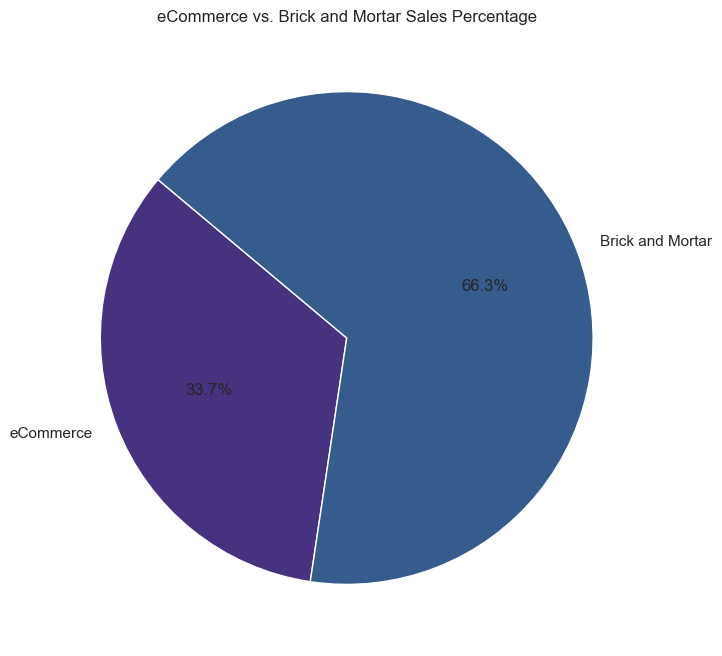

In [25]:
# Separate eCommerce and brick-and-mortar sales
ecommerce_sales = merged_data[merged_data['LOCATION_ID'] == -4199173001801520000]
brick_mortar_sales = merged_data[merged_data['LOCATION_ID'] != -4199173001801520000]


total_ecommerce_sales = ecommerce_sales['NET_SALES_UNITS'].sum()
total_brick_mortar_sales = brick_mortar_sales['NET_SALES_UNITS'].sum()

total_sales = total_ecommerce_sales + total_brick_mortar_sales

ecommerce_sales_percentage = (total_ecommerce_sales / total_sales) * 100
brick_mortar_sales_percentage = (total_brick_mortar_sales / total_sales) * 100

print(f"eCommerce Sales Percentage: {ecommerce_sales_percentage:.2f}%")
print(f"Brick and Mortar Sales Percentage: {brick_mortar_sales_percentage:.2f}%")

# Data for the pie chart
sales_data = {
    'eCommerce': total_ecommerce_sales,
    'Brick and Mortar': total_brick_mortar_sales
}


labels = sales_data.keys()
values = sales_data.values()

plt.figure(figsize=(8, 8))
plt.pie(values, labels=labels, autopct='%1.1f%%', startangle=140, colors=sns.color_palette("viridis"))
plt.title('eCommerce vs. Brick and Mortar Sales Percentage')
plt.show()